In [53]:
import pandas as pd 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


df = pd.read_csv('dat', header=None, sep=" ")
data = df.values

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, X_test.shape)

le = preprocessing.LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)


model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(207, 6) (103, 6)
MAE: 0.445


In [54]:
from sklearn.ensemble import IsolationForest


df = pd.read_csv('dat', header=None, sep=" ")
data = df.values

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, X_test.shape)

le = preprocessing.LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(207, 6) (103, 6)
(186, 6) (186,)
MAE: 0.412


In [60]:
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv('dat', header=None, sep=" ")
data = df.values

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the training dataset
print(X_train.shape, X_test.shape)

le = preprocessing.LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)



(207, 6) (103, 6)
(204, 6) (103, 6)
MAE: 0.408


In [65]:
import pandas as pd 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv('dat', header=None, sep=" ")
df = df.values
or_data = df[:, :-1]
data, label = df[:, :-1], df[:, -1]
print(data.shape, label.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(data)

mask = yhat != -1
data, label = data[mask, :], label[mask]
print(data.shape, label.shape)

min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scalar.fit_transform(data)
x_scaled

(310, 6) (310,)
(298, 6) (298,)


array([[0.38335082, 0.51982851, 0.28284843, 0.41439927, 0.27004393,
        0.07946192],
       [0.10388248, 0.29671311, 0.11168466, 0.23891776, 0.48613399,
        0.11481917],
       [0.45097353, 0.51393355, 0.4057954 , 0.5081015 , 0.37053817,
        0.05535137],
       ...,
       [0.36492946, 0.5223294 , 0.3598076 , 0.38795475, 0.64071938,
        0.06137901],
       [0.17605223, 0.27224009, 0.30595964, 0.35447875, 0.5429709 ,
        0.08284328],
       [0.04302204, 0.20757413, 0.24800563, 0.23540202, 0.61710599,
        0.07982946]])

In [66]:
def rotated(array_2d):
    list_of_tuples = zip(*array_2d[::-1])
    return [list(elem) for elem in list_of_tuples]

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):

    ny = len(data[0])
    ind = list(range(ny))
    print(ny)

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [68]:
or_data

array([[63.03, 22.55, 39.61, 40.48, 98.67, -0.25],
       [39.06, 10.06, 25.02, 29.0, 114.41, 4.56],
       [68.83, 22.22, 50.09, 46.61, 105.99, -3.53],
       ...,
       [61.45, 22.69, 46.17, 38.75, 125.67, -2.71],
       [45.25, 8.69, 41.58, 36.56, 118.55, 0.21],
       [33.84, 5.07, 36.64, 28.77, 123.95, -0.2]], dtype=object)

310


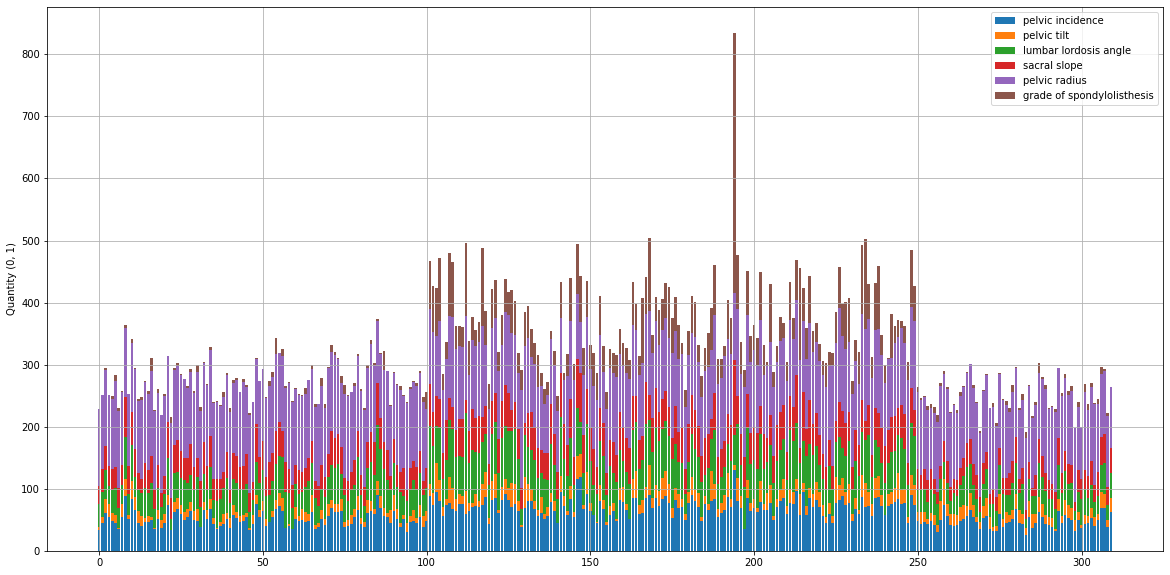

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# series_labels = ['Series 1', 'Series 2']
series_labels =["pelvic incidence","pelvic tilt","lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"]

# data = [
#     [0.2, 0.3, 0.35, 0.3],
#     [0.8, 0.7, 0.6, 0.5]
# ]

# category_labels = range(0, 298)

x_scaled = rotated(x_scaled)
data = rotated(data)
or_data = rotated(or_data)

name = 'or_data'
plot_stacked_bar(
    or_data,
    series_labels, 
#     category_labels=category_labels, 
#     show_values=True, 
    value_format="{:.1f}",
#     colors=['tab:orange', 'tab:green', ''],
    y_label="Quantity (0, 1)"
)

plt.savefig(f'bar_{name}.png')
plt.show()